# A Demonstration of the Analysis of the Evolution of Structure and Resilience in Perturbed Systems

### General Instruction:
Sometimes User-Input may be required in the code. These fields will look like this:<br><br>
\###########################<br>
\#-------------------------------------#<br>
user_input =<br>
\#-------------------------------------#<br>
\###########################<br><br>

Goals of the notbook:<br>
1. Introduction and explanation of new concepts and vizualisations developed to describe system evolution and resilience and their relationship to each other<br>
2. Demonstrate the use of the SEA-software (Sytem Evolution Analysis-software) and show how our framework can be applied to analyze randomly perturbed systems
   using simulation data from pyRN

You can generate networks and random walks for the analysis inside this notbook or load external data and skip right to the analysis part after importing all the packages

In [2]:
from pyRN import pyRN

import dataRetrivalService
import plot_change
import plot_complexitychange
import plot_hasse
import plot_raw
import sos
import transition_dataframe

import copy
import json
import matplotlib.pyplot as plt
import pandas

## Random Network Generation

A random reaction network can be initialized using on of the functions
- `setRandomgeneratedNoInflow()`
- `setRandomgeneratedWithInflow()`
- `setRandomgeneratedExtraNoInflow()`
- `setRandomgeneratedExtraWithflow()`

This initialization contains multiple parameters:
- `Nr`   number of reactions (>1) 
- `Ns`   number of species (>1)
- others (all parameters are optional)

For the details on random retwork generation please check the `Random Network Generation.ipynb`-file that comes with pyRN

In [13]:
RN=pyRN.setRandomgeneratedNoInflow(Nr=12,Ns=12,extra=.5, dist=lambda x: x*0+1, pr=0, pp=0)
nt=RN.getRnDisplayPv() #display of the network
nt.show("RG_0.html")

## Random Walk Generation

For details on random walks please check the `Simulator and Random Walks.ipynb`-file that comes with pyRN

In [23]:
RN.setMakModel(i_sp=None,rt=None,cutoff=0.1) # Creates a model for the network with reaction rates following mass-action kinetics
RN.setGenerators()
RN.setRw(w=range(2),l=25,cutoff=.1,rt=None,n=5000,trys=10,sim_save=True,fname="rand_walk.json")

InvalidIndexError: (slice(None, None, None), 25)

##

## Abstractions

Since we are interested in the structural evolution of we are more interessted in qualitative descriptions of a systems state than the state itself.
While the state of a system is a quantitative measure it can be described qualitativly using abstractions.<br>
We will be therfore use abstractions, which are mappings $\mathbb{R}^n \rightarrow \mathbb{R}^n$<br>
A systems state is determined by number of species concentrations. It's a vector c with $c_i \in [0,1]$<br>
A states abstraction is determined by the species present or associated with it. It's a vector c with $c_i \in $ {0,1}<br><br>

We defined 3 different abstractions:
1. Species with sufficiently big concentrations to be considered present (The threshold can be choosen for each species individually)<br>
2. Species like in 1. with the additional condition to be active (Involved in reactions)<br>
3. The closure of 2. (All species that could be generated starting only from species in 2. <br><br>

The simulation data contains the different kind of abstraction for the convergent state of every step in the random walk
In the data these abstractions are encoded by `u`, `a` and `ca`





In [58]:
###############################################
#---------------------------------------------#
json_path = './rand_walk.json'
#---------------------------------------------#
# path to json-file with simulation data      #
###############################################

###############################################
#---------------------------------------------#
abstraction_type = 'a'
#---------------------------------------------#
# Choose type of abstraction                  #
# options: 'u','a','ac'                       #
###############################################

###############################################
#---------------------------------------------#
rndw_index = 1
#---------------------------------------------#
# Choose index of rhe random walk of interest #
# options: 0,1,2,...                          #
###############################################

rndws = dataRetrivalService.get_RNDWs(json_path, abstraction_type)
rndw_abstractions = rndws[rndw_index]
for abstraction in rndw_abstractions:
    print(abstraction)


[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]


## Plotting the trajectory

SEA offers a variety of ways to plot the trajectory of a systems evolution

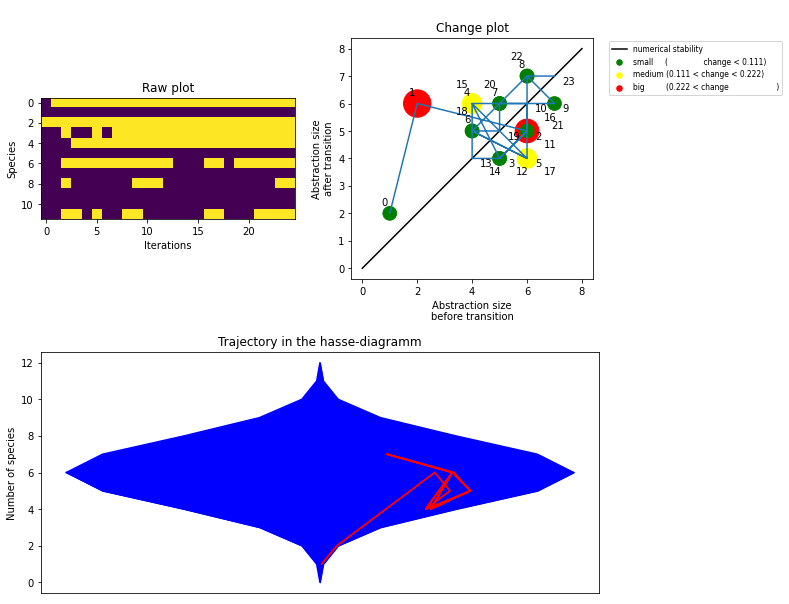

In [5]:
# subplot initialization
figure = plt.figure(figsize=(10, 16))
ax00 = plt.subplot2grid((3,2),(0,0))
ax01 = plt.subplot2grid((3,2),(0,1))
ax1  = plt.subplot2grid((3,2),(1,0), colspan=2)

plot_raw.plot_raw(ax00, rndw_abstractions, title='')
plot_hasse.plot_hasse(ax1, [rndw_abstractions], title='', loga=(len(rndw_abstractions[0])>15))
plot_change.plot_change(ax01, rndw_abstractions, change_function=sos.normalized_hamming_distance, title='', show_indices=True, index_spacing=1, legend=True)

plt.subplots_adjust(hspace=0.3)
plt.show()

## Towards a global analysis of possible system evolutions

Some aspects of system evolution and system resilience are getting clearer when we are not analyzing random walks individually but together.<br>
Random walks are markov-processes. In our scenario we can model system evolution as a set of stable abstractions with different possibilities<br>
to transition to one another. This also leads to a new perspective on resilience <br>

We define two different but related kinds of resilience
- local resilience, the ability of a systems organization to withstand perturbations
- global resilience, the ability of a systems organization to withstand perturbations or return to it as result of future perturbations

This also leads to the question if resilience of systems is maybe best understood not as a propertiy of a single organization but maybe shared<br>


<img src='ResilienceMatrix.png' width="523" height="408">

### An Extendible pandas with information on abstractions and transitions

For the analysis of multiple random walks we provide a pandas dataframe as an comprehensive, easily accesible interface that can be easily extended in the future<br><br>

In the dataframe local resilience is called strict_maintainability and global resilience is called maintainability 

In [26]:
abstractions_df, transitions_df = transition_dataframe.data_from_json('./rand_walk.json', 'a', save=False, file_path=None)
pandas.options.display.float_format = '{:,.3f}'.format
display(abstractions_df)
display(transitions_df)

,a,#species,n_init,complexity,indegree,outdegree,reachability,maintainability,strict_maintainability
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,3,0.000,1,8,0.004,0.000,0.000
1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1,4,0.417,0,1,0.004,0.000,0.000
2,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",1,4,0.083,1,1,0.004,0.000,0.000
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1,0,0.083,1,2,0.004,0.000,0.000
4,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",1,2,0.917,1,2,0.004,0.000,0.000
...,...,...,...,...,...,...,...,...,...
95,"[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]",6,0,0.500,1,1,0.004,0.000,0.000
96,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]",6,0,0.833,5,4,0.004,0.001,0.200
97,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]",6,0,0.833,4,2,0.004,0.001,0.400
98,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]",7,0,1.250,22,17,0.059,0.010,0.229


,a1,a2,a_1,a_2,counts,change_local,change_global,complexity_change,probability
0,43,43,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]",19,0.000,0.000,0,0.559
1,43,88,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]","[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]",2,0.333,0.167,0,0.059
2,88,88,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]","[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]",10,0.000,0.000,0,0.278
3,88,43,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]","[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]",1,0.333,0.167,0,0.028
4,43,41,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]",2,0.250,0.083,0,0.059
...,...,...,...,...,...,...,...,...,...
366,15,64,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]",1,0.800,0.333,0,0.031
367,64,68,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]",1,0.200,0.083,0,0.500
368,68,64,"[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]",1,0.200,0.083,0,1.000
369,64,98,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]","[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]",1,0.429,0.250,0,0.500


s = abstractions_df

In [32]:
def abstraction_filter(abstractions_df, l, g, reindex=False):
    '''
    In:  abstractions_df (pandas dataframe)
         l (float), threshold for local resilience
         g (float), threshold for local resilience
    Out: abstractions_df (pandas dataframe)
    '''
    filtered_abstractions_df = copy.copy(abstractions_df)
    filtered_abstractions_df = abstractions_df.loc[(abstractions_df['strict_maintainability']>=l) & (abstractions_df['maintainability']>=g)]
    if reindex:
        filtered_abstractions_df.reset_index()
    return filtered_abstractions_df

filtered_abstractions_df = abstraction_filter(abstractions_df, 0.25, 0.002, reindex=False)
display(filtered_abstractions_df)

,a,#species,n_init,complexity,indegree,outdegree,reachability,maintainability,strict_maintainability
9,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,2,0.417,7,2,0.004,0.008,0.954
39,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]",3,0,0.583,6,8,0.004,0.003,0.630
43,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]",4,1,0.667,12,7,0.004,0.005,0.559
52,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]",4,0,1.000,8,6,0.004,0.007,0.567
55,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]",4,0,0.667,5,7,0.004,0.003,0.417
61,"[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]",4,0,1.000,9,9,0.004,0.015,0.705
62,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]",4,0,0.667,8,6,0.004,0.004,0.643
65,"[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]",5,0,1.083,12,9,0.004,0.017,0.662
72,"[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]",5,0,0.750,9,7,0.004,0.004,0.476
75,"[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]",5,4,1.083,13,16,0.004,0.005,0.261


Int64Index([9, 39, 43, 52, 55, 61, 62, 65, 72, 75, 76, 79, 82, 84, 88, 91, 92,
            93],
           dtype='int64')


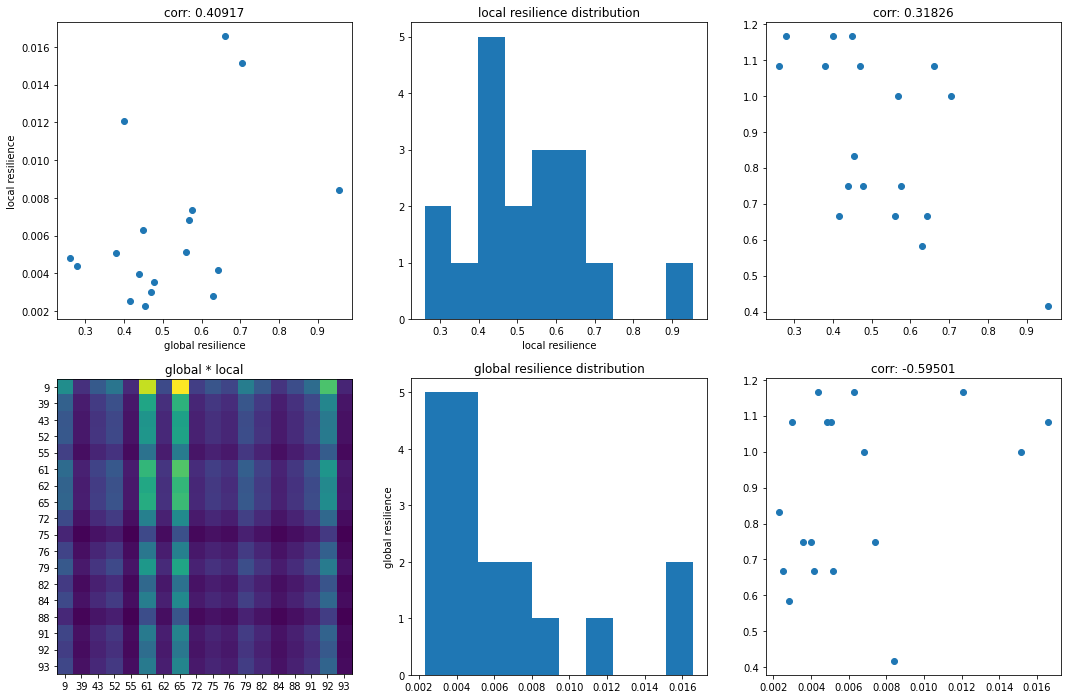

Correlation Complexity/global resilience : 0.55136


In [49]:
def plotStuff(abstractions_df):
    global_r= abstractions_df['maintainability'].tolist()
    local_r = abstractions_df['strict_maintainability'].tolist()
    conj_resilience = [[global_r[i]*local_r[j] for i in range(len(global_r))] for j in range(len(local_r))]

    fig, axes = plt.subplots(2,3,figsize=(18,12))
    axes[0][0].scatter(local_r,global_r)
    axes[0][0].set_xlabel('global resilience')
    axes[0][0].set_ylabel('local resilience')
    axes[0][0].set_title(f'corr: '+str(round(abstractions_df['maintainability'].corr(abstractions_df["strict_maintainability"]),5)))
    axes[1][0].imshow(conj_resilience)
    indexes = abstractions_df.index
    axes[1][0].set_xticks(ticks=[i for i in range(len(indexes))], labels=indexes)
    axes[1][0].set_yticks(ticks=[i for i in range(len(indexes))], labels=indexes)
    axes[1][0].set_title('global * local')
    axes[0][1].hist(local_r)
    axes[0][1].set_xlabel('local resilience')
    axes[0][1].set_title('local resilience distribution')
    axes[1][1].hist(global_r)
    axes[1][1].set_ylabel('global resilience')
    axes[1][1].set_title('global resilience distribution')
    complexities = abstractions_df['complexity'].tolist()
    axes[0][2].scatter(local_r, complexities)
    axes[0][2].set_title(f'corr: '+str(round(abstractions_df['maintainability'].corr(abstractions_df["complexity"]),5)))
    axes[1][2].scatter(global_r, complexities)
    axes[1][2].set_title(f'corr: '+str(round(abstractions_df['complexity'].corr(abstractions_df["strict_maintainability"]),5)))
    plt.show()

plotStuff(filtered_abstractions_df)

### Vizualization of the markov-model

Based on the data from the simulations we obtained a markov model that we can plot. It should be noticed that because of the nature of our simulation (random walks instead of systematic space exploration) the reliability of the determined transition probabilities might vary dramatically.

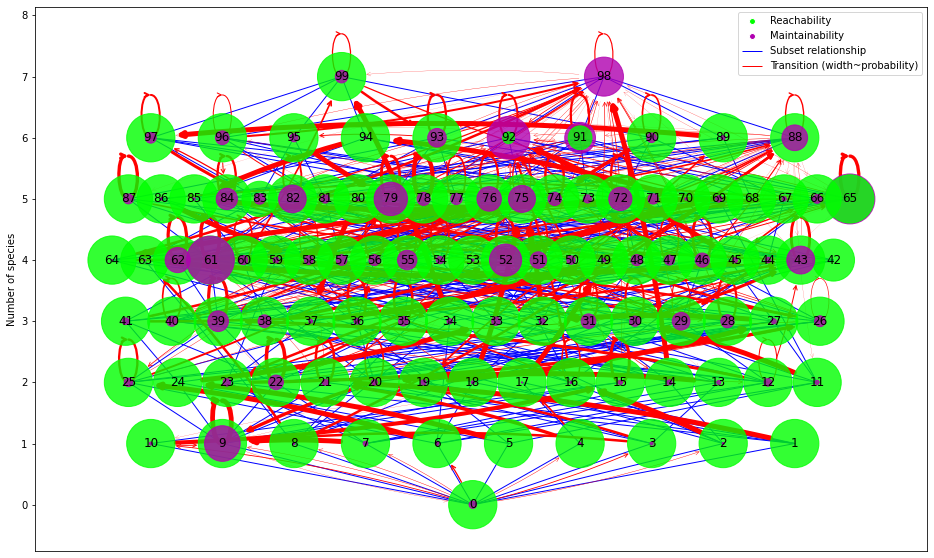

<Figure size 432x288 with 0 Axes>

In [51]:
import plot_markov

fig, axes = plot_markov.plot_markov(abstractions_df,transitions_df)
figure = plt.figure()
plt.show()

## Complexity Analysis

Next we want to analyze complexity and how it is related to the evolution and resilience of a system<br><br>

Complexity is defined as:<br>

Properties of points in the complexity plot:
- size: global resilience
- opacity: local resilience
-



Correlation Complexity/local  resilience : 0.27437
Correlation Complexity/global resilience : 0.38571


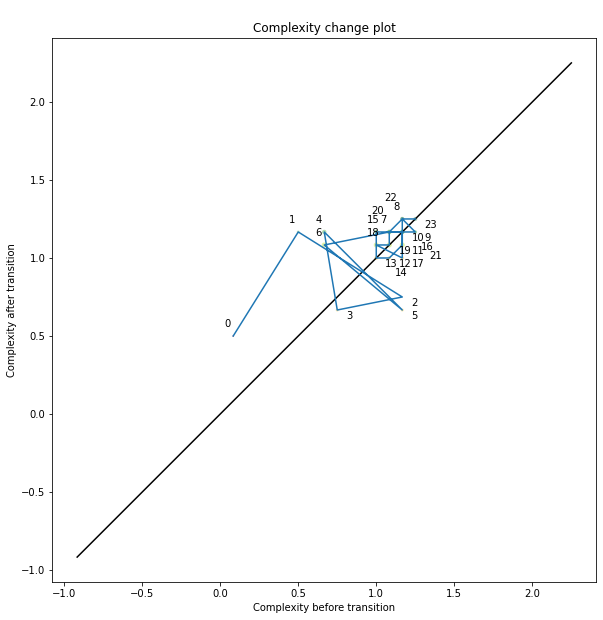

In [50]:
print('Correlation Complexity/local  resilience : '+ str(round(abstractions_df['complexity'].corr(abstractions_df["strict_maintainability"]),5)))
print('Correlation Complexity/global resilience : '+ str(round(abstractions_df['complexity'].corr(abstractions_df["maintainability"]),5)))

complexities = dataRetrivalService.get_CPs("./rand_walk.json", 'ca')[2]
fig, axes = plt.subplots(figsize=(10, 10))
plot_complexitychange.plot_complexitychange(axes, rndw_abstractions, abstractions_df, title='', show_indices=True, index_spacing=1)


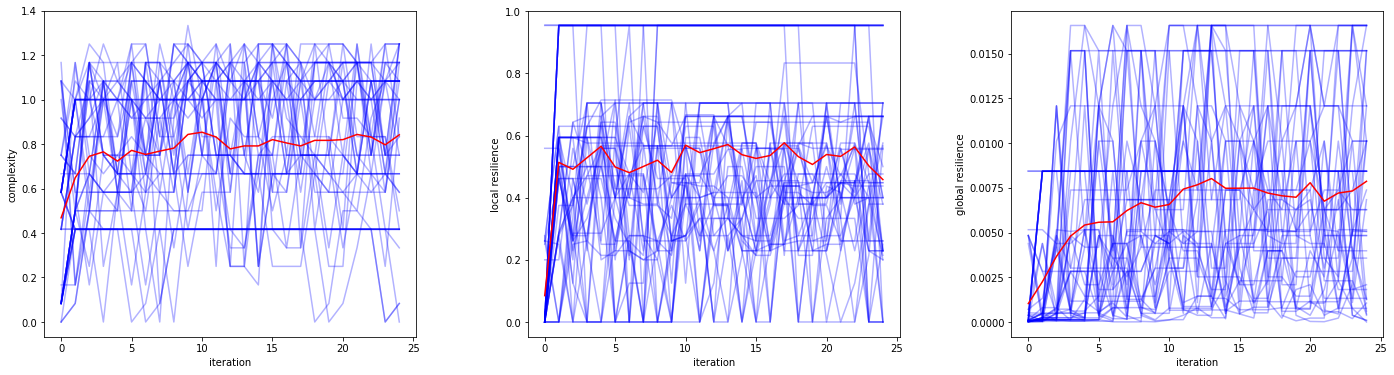

In [79]:
def development(rndw, abstractions_df, property):
    '''
    In:  rndw (2D-array), a list of abstractions
         abstractions_df (pandas dataframe)
         propertiý (string), name of a column in abstractions_df
    Out: development (list), the development of a property
    '''
    try:
        development = []
        for step in rndw:
            abstractions_df_copy = copy.copy(abstractions_df)
            abstraction = abstractions_df_copy.loc[abstractions_df_copy['a']==str(step)]
            development.append(abstraction[property])
        return development
    except:
        print('Did you use a filtered dataframe?')

def plot_developments(rndws, abstractions_df):
    n = len(rndws[0])
    fig, axes = plt.subplots(1,3,figsize=(24,6))
    axes[0].set_ylabel('complexity')
    axes[1].set_ylabel('local resilience')
    axes[2].set_ylabel('global resilience')
    axes[0].set_xlabel('iteration')
    axes[1].set_xlabel('iteration')
    axes[2].set_xlabel('iteration')
    sum_comp = [0 for i in range(len(rndws[0]))]
    sum_rloc = [0 for i in range(len(rndws[0]))]
    sum_rglo = [0 for i in range(len(rndws[0]))]
    for rndw in rndws:
        dev_comp = development(rndw, abstractions_df,'complexity')
        dev_rloc = development(rndw, abstractions_df, 'strict_maintainability')
        dev_rglo = development(rndw, abstractions_df, 'maintainability')
        sum_comp = [float(sum_comp[i]+dev_comp[i]) for i in range(n)]
        sum_rloc = [float(sum_rloc[i]+dev_rloc[i]) for i in range(n)]
        sum_rglo = [float(sum_rglo[i]+dev_rglo[i]) for i in range(n)]
        axes[0].plot(range(len(rndw)), dev_comp, color='blue', alpha=0.3)
        axes[1].plot(range(len(rndw)), dev_rloc, color='blue', alpha=0.3)
        axes[2].plot(range(len(rndw)), dev_rglo, color='blue', alpha=0.3)
    avg_comp = [sum_comp[i]/len(rndws) for i in range(n)]
    avg_rloc = [sum_rloc[i]/len(rndws) for i in range(n)]
    avg_rglo = [sum_rglo[i]/len(rndws) for i in range(n)]
    axes[0].plot([i for i in range(n)], avg_comp, color='red')
    axes[1].plot(range(n), avg_rloc, color='red')
    axes[2].plot(range(n), avg_rglo, color='red')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

plot_developments(rndws, abstractions_df)


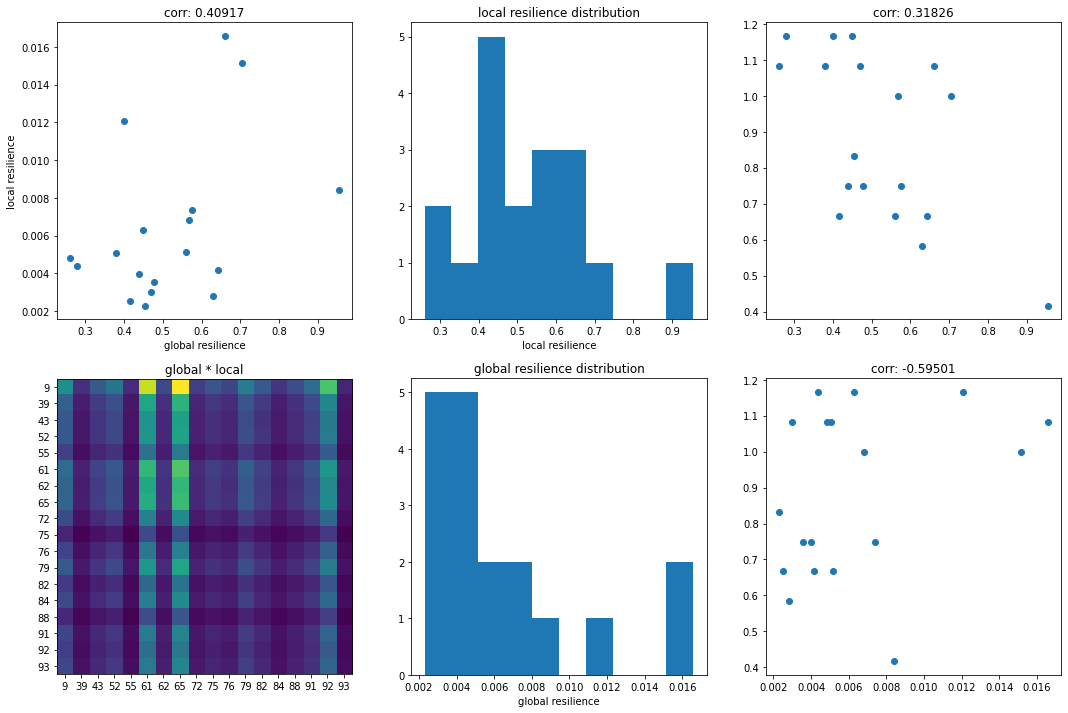

In [81]:
def plotStuff(abstractions_df):
    global_r= abstractions_df['maintainability'].tolist()
    local_r = abstractions_df['strict_maintainability'].tolist()
    conj_resilience = [[global_r[i]*local_r[j] for i in range(len(global_r))] for j in range(len(local_r))]

    fig, axes = plt.subplots(2,3,figsize=(18,12))
    axes[0][0].scatter(local_r,global_r)
    axes[0][0].set_xlabel('global resilience')
    axes[0][0].set_ylabel('local resilience')
    axes[0][0].set_title(f'corr: '+str(round(abstractions_df['maintainability'].corr(abstractions_df["strict_maintainability"]),5)))
    axes[1][0].imshow(conj_resilience)
    indexes = abstractions_df.index
    axes[1][0].set_xticks(ticks=[i for i in range(len(indexes))], labels=indexes)
    axes[1][0].set_yticks(ticks=[i for i in range(len(indexes))], labels=indexes)
    axes[1][0].set_title('global * local')
    axes[0][1].hist(local_r)
    axes[0][1].set_xlabel('local resilience')
    axes[0][1].set_title('local resilience distribution')
    axes[1][1].hist(global_r)
    axes[1][1].set_xlabel('global resilience')
    axes[1][1].set_title('global resilience distribution')
    complexities = abstractions_df['complexity'].tolist()
    axes[0][2].scatter(local_r, complexities)
    axes[0][2].set_title(f'corr: '+str(round(abstractions_df['maintainability'].corr(abstractions_df["complexity"]),5)))
    axes[1][2].scatter(global_r, complexities)
    axes[1][2].set_title(f'corr: '+str(round(abstractions_df['complexity'].corr(abstractions_df["strict_maintainability"]),5)))
    plt.show()

plotStuff(filtered_abstractions_df)